In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import csv
import os
from repast4py import parameters

params = parameters.init_params("model1.yaml", "")

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: PlannerMultiErrori
Current folders are:
PlannerMultiErrori.0


In [3]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [4]:
#names=["inv goods bought", "inv goods inventories", "grossInvestments","grossInvExpected"]
names= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    names[i] = "inv goods bought type "+str(params['investmentGoods'][i])

names.append("inv goods inventories")
names.append("grossInvestments")
names.append("grossInvExpected")

In [5]:
os.chdir("../"+folder+".0")
#planner info database from rank==0
plannerInfo=pd.read_csv('plannerInfo.csv', header=None)
#print(plannerInfo)
#planner info database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    plannerInfo=plannerInfo.add(pd.read_csv('plannerInfo.csv', header=None))
plannerInfo.columns=names
#pd.DataFrame(plannerInfo)

In [6]:
plannerInfo

,inv goods bought type 1,inv goods inventories,grossInvestments,grossInvExpected
0,0.000000,0.000000,0.000000,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000e+00
2,1167.795125,1370.894444,0.000000,0.000000e+00
3,3931.194280,4468.888209,0.000000,0.000000e+00
4,6031.618561,6863.352262,0.000000,0.000000e+00
5,8100.513522,9297.983700,0.000000,1.132575e+05
6,7108.270239,7966.767400,8100.513522,2.063704e+05
7,10920.446391,12752.716605,7108.270239,3.208636e+05
8,7811.272420,8964.549381,10920.446391,4.629019e+05
9,10004.424894,11265.275573,7811.272420,5.620769e+05


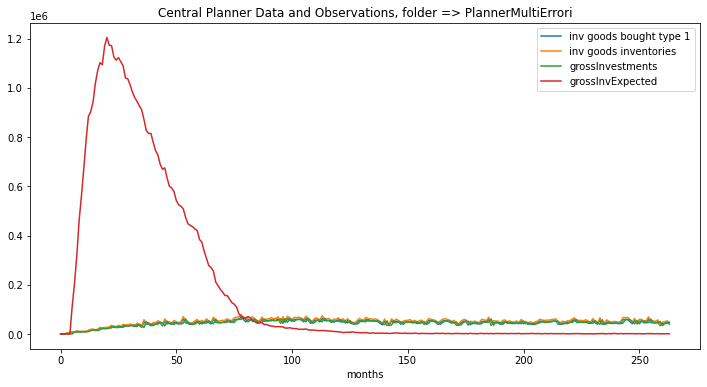

In [7]:
fig=plannerInfo.plot(figsize=(12,6), title="Central Planner Data and Observations, folder => " + folder,\
                     xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlot.jpg",dpi=180)


['inv goods bought type 1']


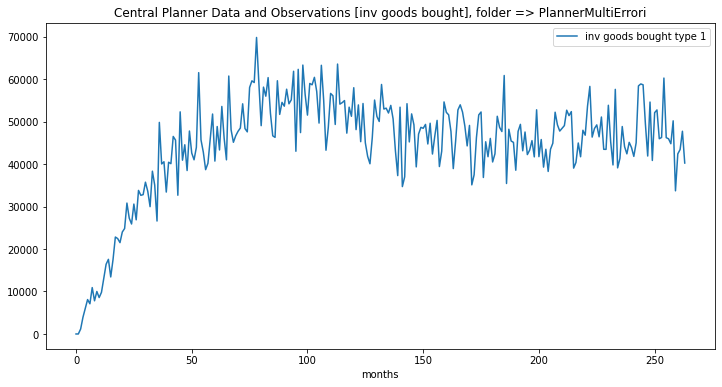

In [8]:
namesInvGoods= [' '] * len(params['investmentGoods'])
for i in range(len(params['investmentGoods'])):
    namesInvGoods[i] = "inv goods bought type "+str(params['investmentGoods'][i])
print(namesInvGoods)
    
fig=plannerInfo[namesInvGoods].plot(figsize=(12,6), \
        title="Central Planner Data and Observations [inv goods bought], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)

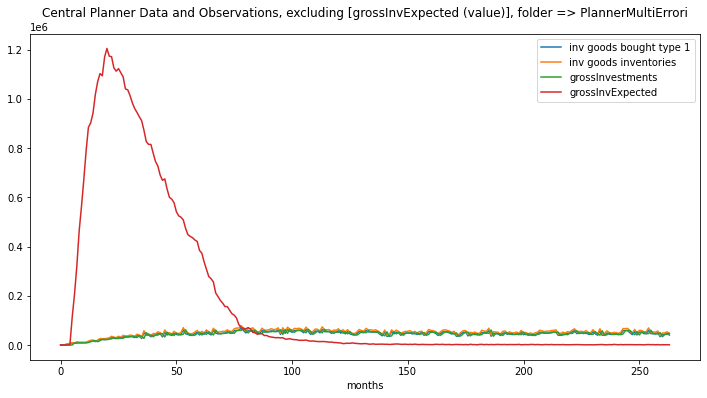

In [9]:
fig=plannerInfo[names].plot(figsize=(12,6), \
        title="Central Planner Data and Observations, excluding [grossInvExpected (value)], folder => " + folder,xlabel="months")
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_"+folder+"_centralPlannerPlotInvGoodsBought.jpg",dpi=180)